In [1]:
import numpy as np
import pandas as pd
from itertools import permutations
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_dataset(sigma: float):
    samples1 = np.random.multivariate_normal(\
        np.array([-1, -1]), sigma * np.array([[2, 0.5], [0.5, 1]]), 100)
    samples2 = np.random.multivariate_normal(\
        np.array([1, -1]), sigma * np.array([[1, -0.5], [-0.5, 2]]), 100)
    samples3 = np.random.multivariate_normal(\
        np.array([0, 1]), sigma * np.array([[1, 0], [0, 2]]), 100)
    dataset = np.concatenate((samples1, samples2, samples3))
    labels = [0] * 100 + [1] * 100 + [2] * 100
    return (dataset, np.array(labels))

In [3]:
def km_clustering(X: np.array, K: int) -> (np.array, np.array):
    # randomly select k centroids
    dbounds = [(np.min(X[:, i]), np.max(X[:, i])) for i in range(X.shape[1])]
    centers = np.array([[np.random.random_sample() * (dbounds[j][1] - dbounds[j][0]) + dbounds[j][0] \
                for j in range(len(dbounds))] for i in range(K)])
    converged = False
    Y = np.zeros(X.shape[0])
    iteration = 0
    while not converged:
        iteration += 1
        change = False
        # assign each x to a centroid
        for i in range(len(X)):
            prev_y = Y[i]
            x = X[i]
            distances = np.linalg.norm(centers - x, axis=1)
            closest_center = np.argmin(distances)
            Y[i] = closest_center
            if Y[i] != prev_y:
                change = True
        # update each centroid
        for k in range(len(centers)):
            cluster_points = [X[j] for j in np.where(Y == k)[0]]
            centers[k] = np.mean(cluster_points, axis=0)
        # if no centroid assignment changed, we've converged
        if not change:
            converged = True
            print('Converged after ' + str(iteration) + ' iterations.')
    return (centers, Y)

In [139]:
def gaussian_prob(x: np.array, mean: np.array, cov: np.array) -> float:
    det = np.linalg.det(cov)
    cov_inv = np.linalg.inv(cov)
    exp = np.exp(-0.5 * ((x - mean) @ cov_inv @ (x - mean).T))
    coef = 1 / (np.sqrt((2 * np.pi)**len(x) * det))
    return coef * exp

def gmm_clustering(X: np.array, K: int, convergence_threshold: float=0.01) \
    -> (np.array, np.array, np.array, np.array):

    # initialize parameters
    means = X[np.random.choice(len(X), K, replace=False)]
    covs = np.array([np.identity(X.shape[1])] * K)
    pZ = np.array([1/K] * K)
    W = np.zeros((X.shape[0], K)) # Pr of each x belonging to each z
    converged = False
    iteration = 0

    print(means)
    while not converged:
        iteration += 1

        # E-step: estimate latent variables
        for i in range(len(X)):
            x = X[i]
            for j in range(K):
                prob = gaussian_prob(x, means[j], covs[j]) * pZ[j]
                W[i][j] = prob
            W[i] /= np.sum(W[i])

        # M-step: maximize lower bound by updating parameters
        prev_pZ = pZ
        W_sum = np.sum(W, axis=0)
        pZ = W_sum / len(XpZ)
        means = np.array([np.sum(W[:,j][:,np.newaxis] * X, axis=0)\
                           / W_sum[j] for j in range(K)])
        covs = np.array([(W_sum[j] * (X - means[j]).T @ (X - means[j])) \
                         / W_sum[j] for j in range(K)])
        
        print('===Iteration #' + str(iteration) + '===')
        print(means)
        print(covs)
        print(pZ)
        # Check for convergence
        if np.sum(np.abs(pZ - prev_pZ)) < convergence_threshold:
            converged = True
            print('Converged after ' + str(iteration) + ' iterations.')
        
    return (means, covs, pZ, W)

X, Y = generate_dataset(0.01)
means, covs, pZ, XpZ = gmm_clustering(X, 5)

[[ 0.98628344 -0.96004434]
 [ 0.26963016  1.07510013]
 [ 1.17217854 -1.27246397]
 [-0.96554123 -1.16640796]
 [ 1.08140956 -0.88389119]]
0.15915494309189535
0.16282419048981278
0.15915494309189535
0.06162047056308939
0.15915494309189535
0.10710923252954128
0.15915494309189535
0.9787960153557677
0.15915494309189535
0.1347810366255069
0.15915494309189535
0.14895177056943387
0.15915494309189535
0.046979791434747314
0.15915494309189535
0.10043424357098467
0.15915494309189535
0.99529920994031
0.15915494309189535
0.12181779044865448
0.15915494309189535
0.14571498015137146
0.15915494309189535
0.0378167386564458
0.15915494309189535
0.10121109986798793
0.15915494309189535
1.0
0.15915494309189535
0.11825503878753961
0.15915494309189535
0.13043904668042286
0.15915494309189535
0.04914634288201948
0.15915494309189535
0.08513398536675995
0.15915494309189535
0.985143474201066
0.15915494309189535
0.10648465075036573
0.15915494309189535
0.21568105883109612
0.15915494309189535
0.09243162498484248
0.15915

Converged after 11 iterations.


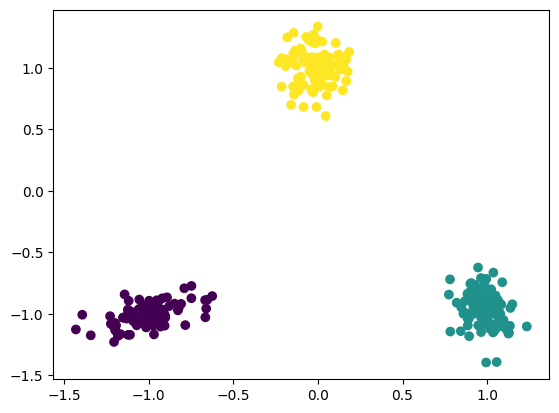

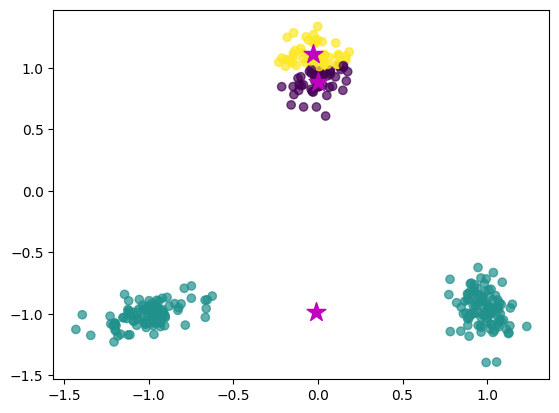

Sigma: 0.01	Accuracy: 0.5	Objective Measure: 211.67845560276984
Converged after 10 iterations.


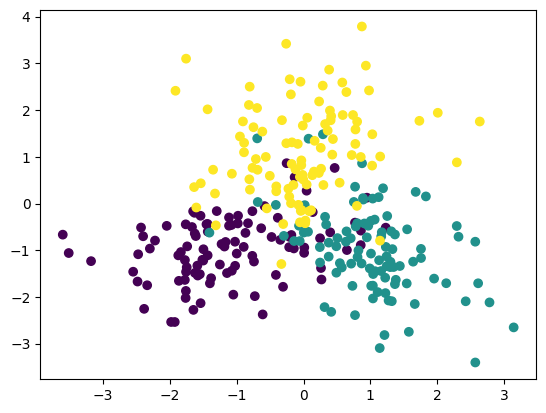

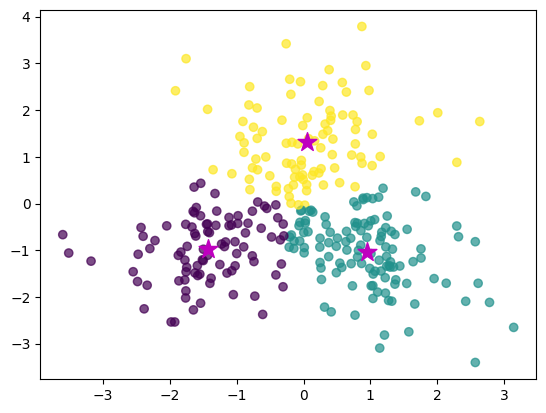

Sigma: 0.5	Accuracy: 0.8366666666666667	Objective Measure: 273.61046168660687
Converged after 8 iterations.


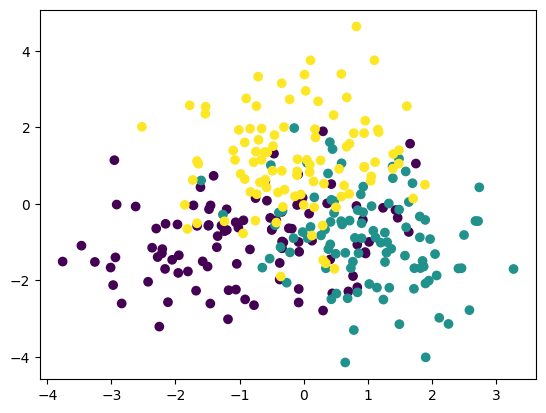

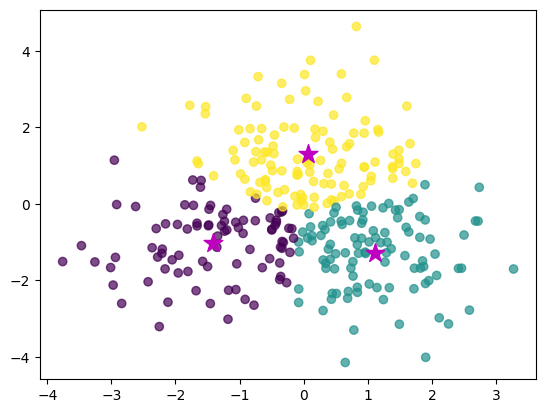

Sigma: 1	Accuracy: 0.7333333333333333	Objective Measure: 337.6972331947298
Converged after 8 iterations.


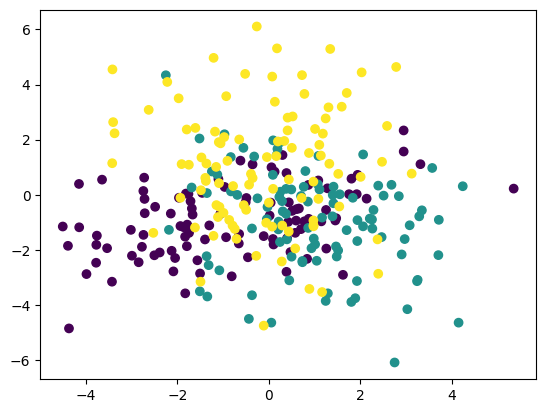

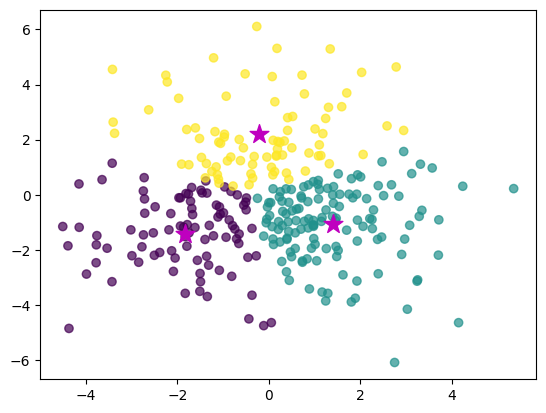

Sigma: 2	Accuracy: 0.6066666666666667	Objective Measure: 466.02359195188217
Converged after 25 iterations.


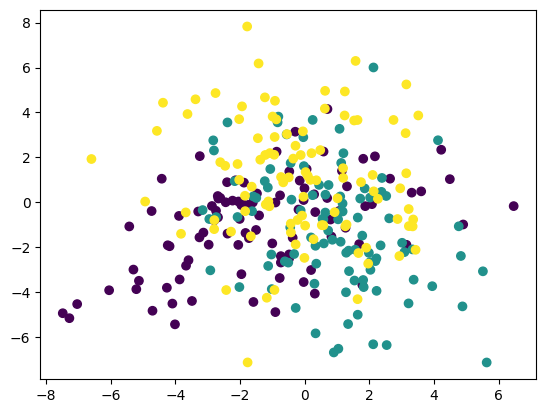

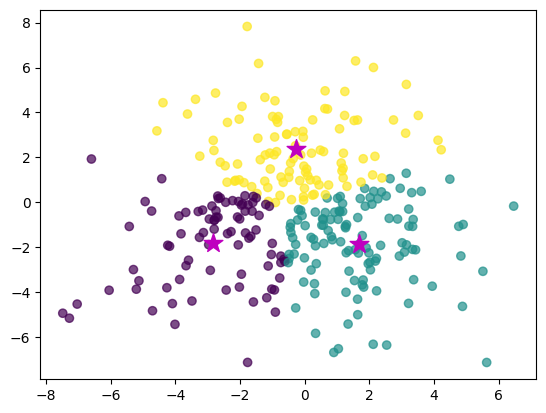

Sigma: 4	Accuracy: 0.57	Objective Measure: 624.9107158867348
Converged after 15 iterations.


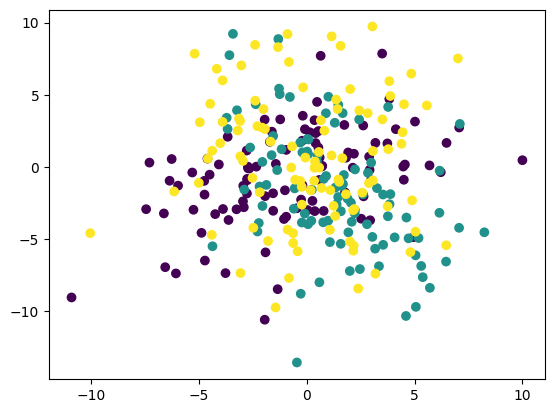

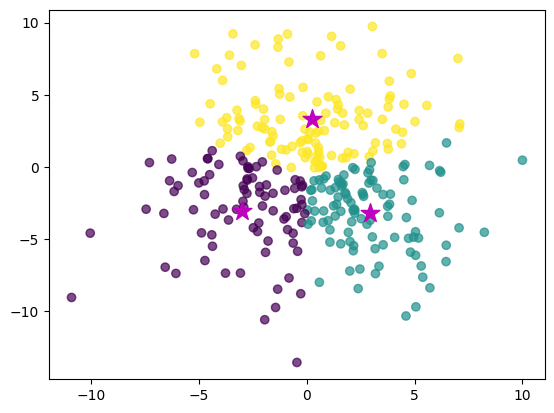

Sigma: 8	Accuracy: 0.5066666666666667	Objective Measure: 924.1557845279449


In [14]:
def calc_accuracy(Y: np.array, Yp: np.array) -> (float, np.array):
    perms = list(permutations(np.unique(Y)))
    accuracies = []
    for perm in perms:
        num_correct = np.sum([1 if Y[i] == perm[Yp[i]] else 0 for i in range(len(Y))])
        accuracies.append(num_correct / len(Y))
    accuracies = np.array(accuracies)
    idx = np.argmax(accuracies)
    best_perm = np.array(perms[idx])
    best_acc = accuracies[idx]
    return (best_acc, best_perm)

def calc_objective(X: np.array, Y: np.array, centroids: np.array) -> float:
    obj = 0
    for k in range(len(centroids)):
        cluster_points = [X[j] for j in np.where(Y == k)[0]]
        distances = np.linalg.norm(cluster_points - centroids[k], axis=1)
        total_distance = np.sum(distances)
        obj += total_distance
    return obj

def calc_log_likelihood(X, means, covs, pZ):
    return

for sigma in [0.01, 0.5, 1, 2, 4, 8]:
    k = 3
    X, Y = generate_dataset(sigma)
    centroids, Yhat = km_clustering(X, k)
    Yhat = Yhat.astype(int)
    acc, labels = calc_accuracy(Y, Yhat)
    objective = calc_objective(X, Yhat, centroids)
    Yhat = labels[Yhat.astype(int)]
    plt.scatter(x=X[:,0], y=X[:,1], c=Y)
    plt.show()
    plt.scatter(x=X[:,0], y=X[:,1], c=Yhat, alpha=0.7)
    plt.scatter(x=centroids[:,0], y=centroids[:,1], c='m', marker='*', s=200)
    plt.show()
    print('Sigma: ' + str(sigma) + '\tAccuracy: ' + str(acc) + '\tObjective Measure: ' + str(objective))